### Query

make $i_{mag} < 18$ and $\text{WD/M}$ pairs


```
SELECT *
FROM mean_param
JOIN magnitudes ON mean_param.iau_name = magnitudes.iau_name
WHERE magnitudes.i < 18 AND mean_param.type = 'WD/M';

```

In [2]:
import csv
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import astropy.units as u
from astropy.modeling.models import Sine1D
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
palette = sns.color_palette()
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
# Make query seperated by commas instead of spaces
with open('og_band_query.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')

    with open('comma_band_query.csv', 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        
        # Iterate through each row
        for row in reader:
            # Replace spaces for commas for each element
            modified_row = [column.replace(' ', ',') for column in row]
            
            writer.writerow(modified_row)

### SDSSJ002200.03+004149.4
*row 1*

In [4]:
star1_result = lk.search_lightcurve('SDSSJ002200.03+004149.4', mission='TESS')
star1_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 70,2023,SPOC,120,293372732,0.0


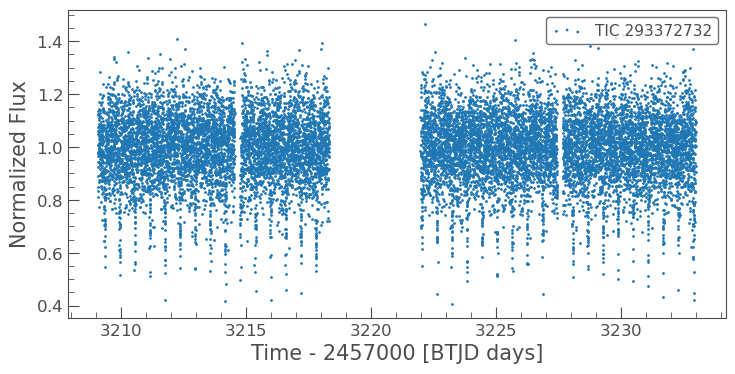

In [5]:
star1_lc = star1_result[0].download().remove_nans().remove_outliers().normalize()
star1_lc.scatter(color=palette[0])
plt.show()

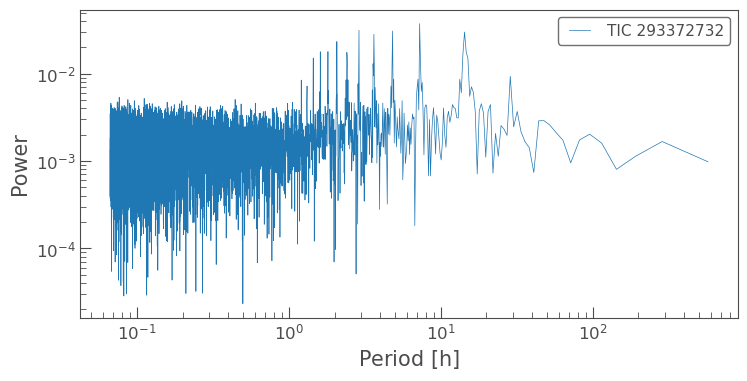

In [6]:
star1_pg = star1_lc.to_periodogram(oversample_factor=1)
star1_pg.plot(color = palette[0], view  = 'period', scale = 'log', unit = u.hr);
plt.show()

In [7]:
star1_pg.period, star1_pg.power, star1_pg.period_at_max_power

(<Quantity [2.38997637e+01, 1.19498819e+01, 7.96658791e+00, ...,
            2.77871919e-03, 2.77839616e-03, 2.77807320e-03] d>,
 <Quantity [0.00097777, 0.00166677, 0.00112814, ..., 0.00115773, 0.00039227,
            0.00180895]>,
 <Quantity 0.30252865 d>)

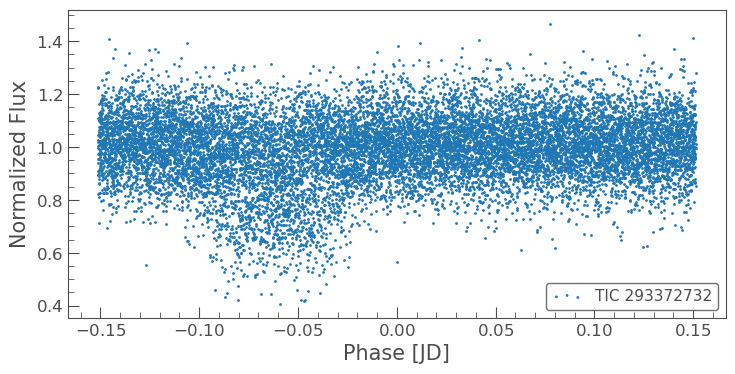

In [8]:
period_fold_lc = star1_lc.fold(period=star1_pg.period_at_max_power).scatter(color = palette[0]);
plt.show()

*maybe figure out a way to check if the line is a flat line?*

In [9]:
period_fold_lc

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

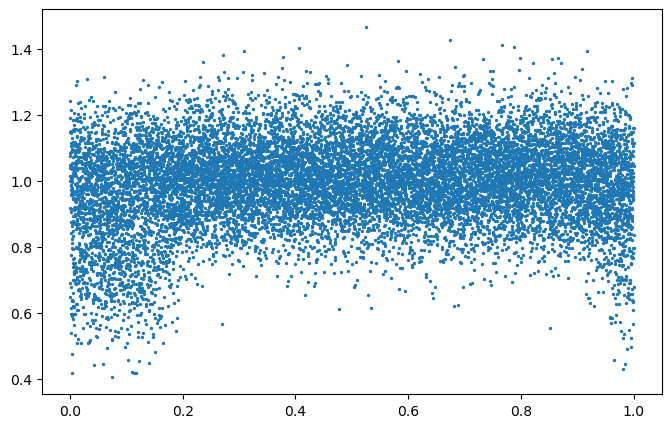

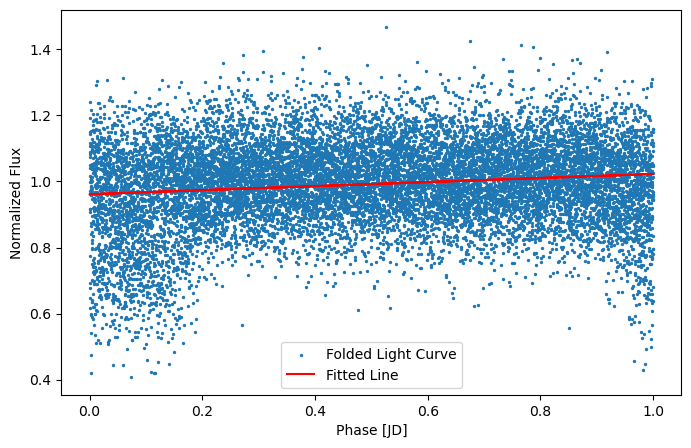

Slope of the fitted line: 0.06135396297278533
Intercept of the fitted line: 0.9614403573192629


In [11]:
# Extract phase and normalized flux values
phase = (star1_lc.time.jd % star1_pg.period_at_max_power.value) / star1_pg.period_at_max_power.value
normalized_flux = star1_lc.flux
x = phase[:, np.newaxis] 

# Fit linear regression model
model = LinearRegression().fit(x, normalized_flux)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the folded light curve and the fitted line
plt.figure(figsize=(8,5))
plt.scatter(phase, normalized_flux, color=palette[0], label='Folded Light Curve', s=2)
plt.plot(phase, model.predict(x), color='red', label='Fitted Line')

plt.xlabel('Phase [JD]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

print("Slope of the fitted line:", slope)
print("Intercept of the fitted line:", intercept)


### SDSSJ003336.49+004151.3
*row 2*

In [12]:
star2_result = lk.search_lightcurve('SDSSJ003336.49+004151.3', mission='TESS')
star2_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 70,2023,SPOC,120,257342896,0.0


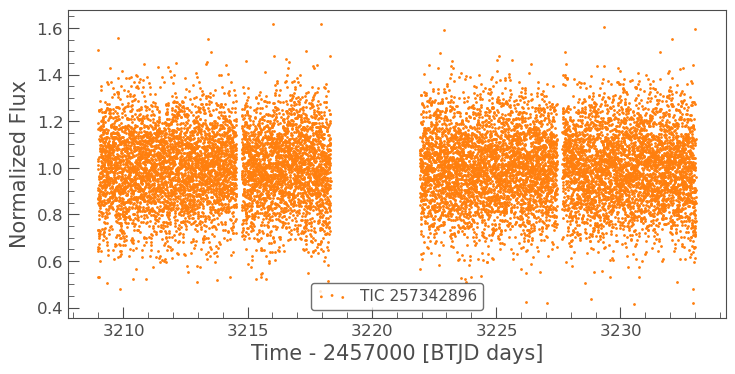

In [14]:
star2_lc = star2_result[0].download().remove_nans().remove_outliers().normalize()
star2_lc.scatter(color=palette[1])
plt.show()

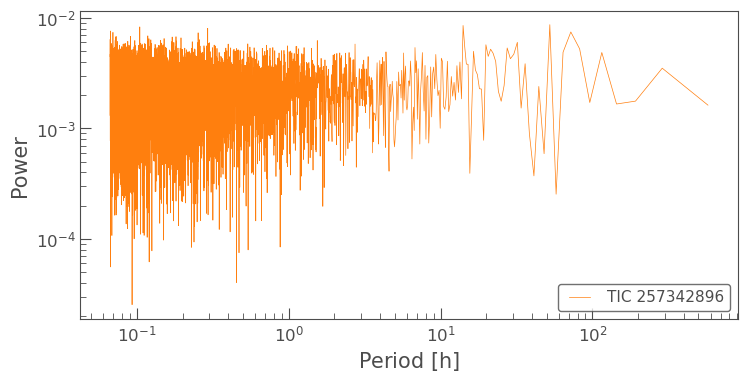

In [15]:
star2_pg = star2_lc.to_periodogram(oversample_factor=1)
star2_pg.plot(color = palette[1], view  = 'period', scale = 'log', unit = u.hr);
plt.show()

In [43]:
star1_pg.period, star1_pg.power, star1_pg.period_at_max_power

(<Quantity [2.38997637e+01, 1.19498819e+01, 7.96658791e+00, ...,
            2.77871919e-03, 2.77839616e-03, 2.77807320e-03] d>,
 <Quantity [0.00097777, 0.00166677, 0.00112814, ..., 0.00115773, 0.00039227,
            0.00180895]>,
 <Quantity 0.30252865 d>)

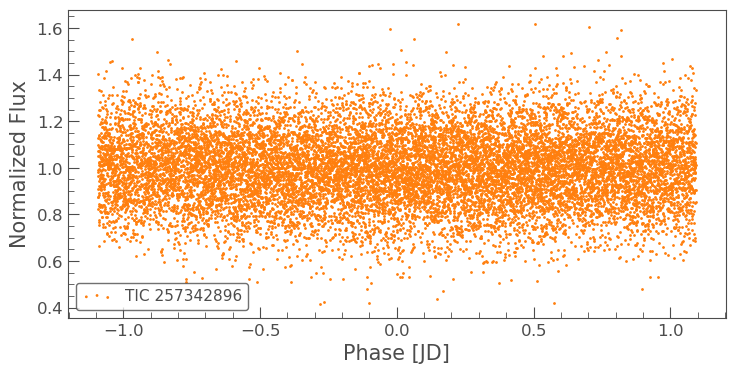

In [16]:
period_fold_lc = star2_lc.fold(period=star2_pg.period_at_max_power).scatter(color = palette[1]);
plt.show()

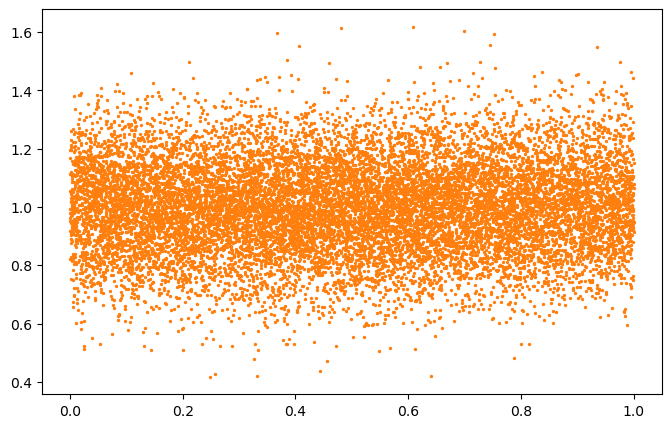

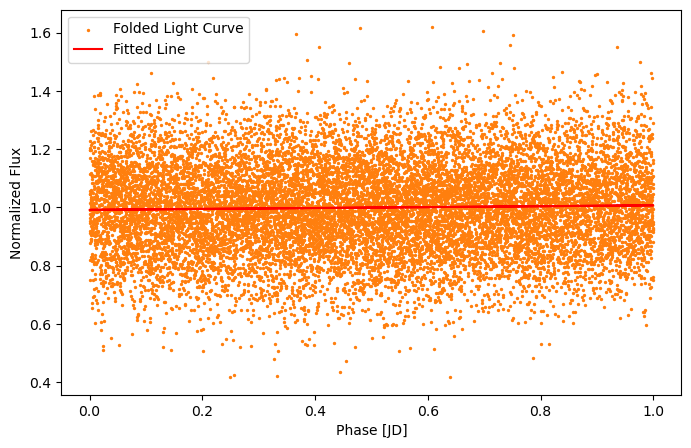

Slope of the fitted line: 0.01547794424146565
Intercept of the fitted line: 0.9918229789504088


In [18]:
# Extract phase and normalized flux values
phase = (star2_lc.time.jd % star2_pg.period_at_max_power.value) / star2_pg.period_at_max_power.value
normalized_flux = star2_lc.flux
x = phase[:, np.newaxis] 

# Fit linear regression model
model = LinearRegression().fit(x, normalized_flux)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the folded light curve and the fitted line
plt.figure(figsize=(8,5))
plt.scatter(phase, normalized_flux, color=palette[1], label='Folded Light Curve', s=2)
plt.plot(phase, model.predict(x), color='red', label='Fitted Line')

plt.xlabel('Phase [JD]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

print("Slope of the fitted line:", slope)
print("Intercept of the fitted line:", intercept)


In [22]:
star2_pg.period_at_max_power.value

2.1858471772650936

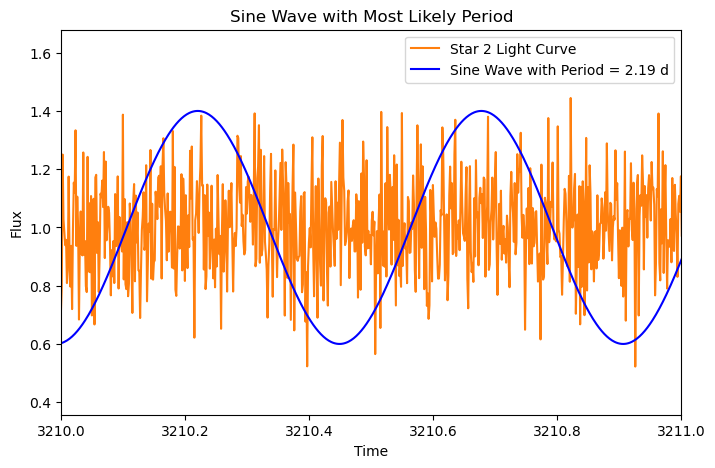

In [53]:
# Retrieve the period at maximum power
most_likely_period = star2_pg.period_at_max_power

# Create a time array for plotting the sine wave
time = star2_lc.time.value
flux = star2_lc.flux

# Create a Sine1D model with the most likely period
sine_model = Sine1D(amplitude=0.4, frequency=most_likely_period.value, phase = 0.2)

# Generate the sine wave
sine_wave = sine_model(time) + 1

# Plot the sine wave
plt.figure(figsize=(8,5))
plt.xlim(3210,3211)
plt.plot(time, flux, color=palette[1], label='Star 2 Light Curve')
plt.plot(time, sine_wave, color='blue', label=f'Sine Wave with Period = {most_likely_period:.2f}')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Sine Wave with Most Likely Period')
plt.legend()
plt.show()


### Plotting all of them

In [ ]:
stars_df = pd.read_csv('comma_band_query.csv')

for i, star in enumerate(stars_df['iau_name']):
    try:
        search_result = lk.search_lightcurve(star, mission='TESS')
        exposures = search_result.exp_time

        # Try to find 120 cadence
    
        

        # # Find 120s cadence
        # if search_result['exptime'] == '120s':
        #     print("yay")
    except:
        print(f"No search results for {star}, at col {i}")

        

[120.] s
[120.] s
[120.] s
[120.] s
[120.] s
[120. 600. 600. 200.] s
[ 120. 1800. 1800.] s
[ 120. 1800.  600.  600.  600.  600.  600.  600.  200. 1800. 1800. 1800.] s
[120.] s
[120.] s
[120.] s


No data found for target "SDSSJ021706.21-000056.2".


No search results for SDSSJ021706.21-000056.2, at col 11


No data found for target "SDSSJ024953.38+000502.3".


No search results for SDSSJ024953.38+000502.3, at col 12


No data found for target "SDSSJ031404.98-011136.6".


No search results for SDSSJ031404.98-011136.6, at col 13
[120. 120. 600. 200.] s


No data found for target "SDSSJ082056.96+190034.0".


No search results for SDSSJ082056.96+190034.0, at col 15
[120.] s
[120. 120.] s
[120. 120.] s


No data found for target "SDSSJ084306.15+362724.3".


No search results for SDSSJ084306.15+362724.3, at col 19
